# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('GermanCredit.csv')

In [3]:
df.shape

(1000, 62)

In [4]:
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df['Class'] = df['Class'].apply(lambda x: 1 if x == 'Good' else 0)
X = df.drop(axis=1, labels=['Class'])
y = df['Class']

# set random_state to get the same observations in training and validation datasets
#
# set stratify=y to get similar distribution of classes in both training and validation sets
# 
# test_size=0.25 means train dataset will contain 75% of data whereas test dataset will contain 25% of data
# i.e. X_train will contain 75% of data and X_valid will contain 25% of data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [7]:
# distribution in training set

# value_counts returns the count of all classes
# normalize=True will return the percentage
y_train.value_counts(normalize=True)

1    0.7
0    0.3
Name: Class, dtype: float64

In [8]:
# distribution in validation set
y_valid.value_counts(normalize=True)

1    0.7
0    0.3
Name: Class, dtype: float64

In [9]:
#shape of training set
X_train.shape, y_train.shape

((750, 61), (750,))

In [10]:
#shape of validation set
X_valid.shape, y_valid.shape

((250, 61), (250,))

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
#creating the decision tree function

dt_model = DecisionTreeClassifier(random_state=10)

In [13]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [14]:
#checking the performance/accuracy of model on training dataset
dt_model.score(X_train, y_train)

1.0

In [15]:
#checking the performance/accuracy of model on validation dataset
dt_model.score(X_valid, y_valid)

0.724

The model performed with 100% accuracy in training dataset whereas it peformed with 72% accuracy only in validation dataset. Hence, the model's performance has high discrepancy between training and validation environments.

### Improving model by changing the max_depth parameter

In [16]:
# Train the decision tree model 10 times and change the max_depth parameter from 1 to 10.

train_accuracy = []
validation_accuracy = []

for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))
    
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.700000,0.700
1,2,0.709333,0.748
2,3,0.742667,0.724
3,4,0.769333,0.740
4,5,0.802667,0.736


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

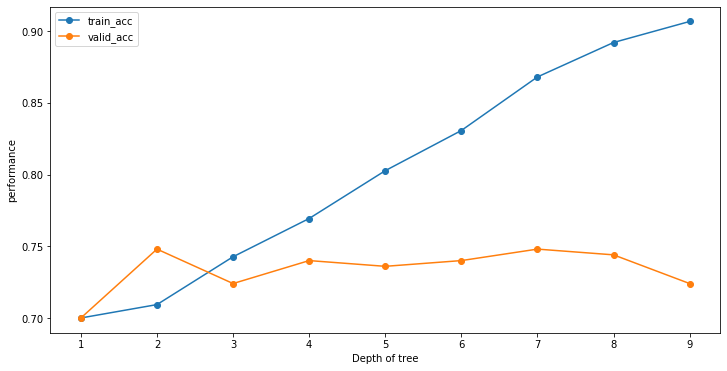

In [18]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend(['train_acc', 'valid_acc']);

Both training and validation accuracy are highest if the depth of tree is 4. Hence, we can choose max_depth parameter value to be 4.

In [19]:
dt_model = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=7, random_state=10)
dt_model.fit(X_train, y_train)
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_valid, y_valid))

0.7506666666666667
0.736


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
y_pred_dt_model = dt_model.predict(X_valid)
dt_score = accuracy_score(y_valid, y_pred_dt_model)
dt_score

0.736


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install [dtreeviz package](https://github.com/parrt/dtreeviz).

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [22]:
from dtreeviz.trees import *

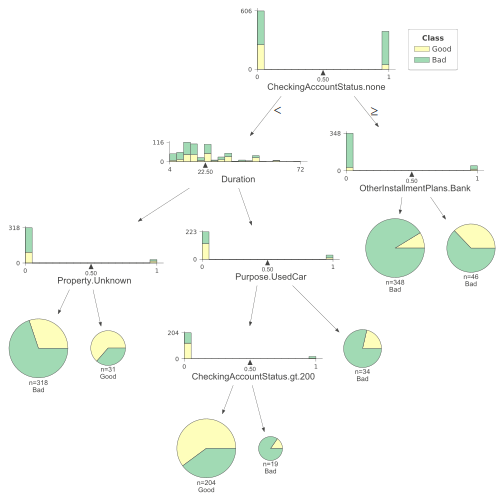

In [23]:
viz = dtreeviz(dt_model, 
               X.values, 
               y.values, 
               target_name='Class',
               feature_names=X_train.columns,
               class_names=['Good', 'Bad'])
viz

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
#checking the performance/accuracy of model on training dataset
forest.score(X_train, y_train)

1.0

In [27]:
#checking the performance/accuracy of model on validation dataset
forest.score(X_valid, y_valid)

0.784

In [28]:
# calculate accuracy score
y_pred_rf = forest.predict(X_valid)
rf_score = accuracy_score(y_valid, y_pred_rf)
rf_score

0.784

As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [29]:
# Your code here
feat_importances = pd.Series(forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feat_importances

Amount                        0.097207
Duration                      0.079749
Age                           0.077460
CheckingAccountStatus.none    0.044339
InstallmentRatePercentage     0.040415
                                ...   
Purpose.DomesticAppliance     0.002446
Purpose.Other                 0.001885
Purpose.Retraining            0.001040
Personal.Female.Single        0.000000
Purpose.Vacation              0.000000
Length: 61, dtype: float64

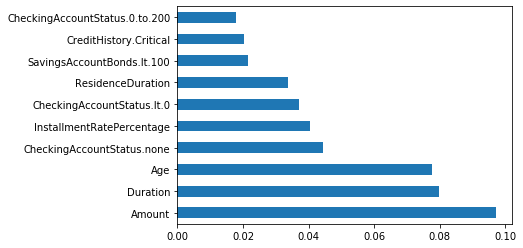

In [30]:
feat_importances.nlargest(10).plot(kind='barh');

Higher the `feature importance`, the more important the feature.

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [31]:
from sklearn.inspection import partial_dependence, plot_partial_dependence

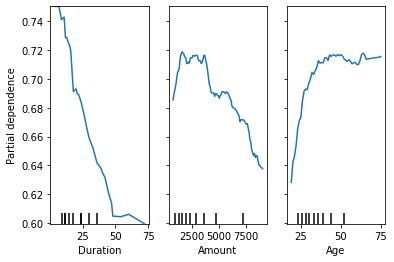

In [32]:
plot_partial_dependence(forest, X_train, ['Duration', 'Amount', 'Age']);

From these plots, we can see that as loan duration and loan amount increases, credit score inclines to 0, which represents `Bad` credit score. On the other hand, there is a positive correlation between age and credit score. 

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [33]:
from xgboost import XGBClassifier

In [34]:
xg_model = XGBClassifier(random_state=11)
xg_model.fit(X_train, y_train)
y_pred_xg_model = xg_model.predict(X_valid)
xg_score = accuracy_score(y_valid, y_pred_xg_model)
xg_score

0.76

In [35]:
from catboost import CatBoostClassifier

In [36]:
cat_model = CatBoostClassifier(random_state=12)
cat_model.fit(X_train,y_train)
y_pred_cat_model = cat_model.predict(X_valid)
cat_score = accuracy_score(y_valid, y_pred_cat_model)
cat_score

Learning rate set to 0.009111
0:	learn: 0.6893161	total: 52.2ms	remaining: 52.1s
1:	learn: 0.6854187	total: 55.4ms	remaining: 27.6s
2:	learn: 0.6818908	total: 58.6ms	remaining: 19.5s
3:	learn: 0.6786795	total: 62.5ms	remaining: 15.6s
4:	learn: 0.6749267	total: 66.1ms	remaining: 13.2s
5:	learn: 0.6712958	total: 69.4ms	remaining: 11.5s
6:	learn: 0.6682180	total: 72.7ms	remaining: 10.3s
7:	learn: 0.6651249	total: 75.3ms	remaining: 9.33s
8:	learn: 0.6617368	total: 78.3ms	remaining: 8.62s
9:	learn: 0.6584311	total: 80.9ms	remaining: 8.01s
10:	learn: 0.6554792	total: 83.6ms	remaining: 7.51s
11:	learn: 0.6524224	total: 86ms	remaining: 7.08s
12:	learn: 0.6498604	total: 88.1ms	remaining: 6.69s
13:	learn: 0.6463839	total: 90.1ms	remaining: 6.34s
14:	learn: 0.6433966	total: 92.7ms	remaining: 6.08s
15:	learn: 0.6400577	total: 94.8ms	remaining: 5.83s
16:	learn: 0.6375440	total: 96.9ms	remaining: 5.61s
17:	learn: 0.6356178	total: 99.3ms	remaining: 5.42s
18:	learn: 0.6325866	total: 102ms	remaining: 5

193:	learn: 0.4335871	total: 545ms	remaining: 2.26s
194:	learn: 0.4327479	total: 547ms	remaining: 2.26s
195:	learn: 0.4321964	total: 550ms	remaining: 2.25s
196:	learn: 0.4315920	total: 552ms	remaining: 2.25s
197:	learn: 0.4310329	total: 555ms	remaining: 2.25s
198:	learn: 0.4303708	total: 558ms	remaining: 2.25s
199:	learn: 0.4302820	total: 560ms	remaining: 2.24s
200:	learn: 0.4296752	total: 562ms	remaining: 2.23s
201:	learn: 0.4289790	total: 568ms	remaining: 2.25s
202:	learn: 0.4285000	total: 574ms	remaining: 2.25s
203:	learn: 0.4277547	total: 576ms	remaining: 2.25s
204:	learn: 0.4273266	total: 578ms	remaining: 2.24s
205:	learn: 0.4267783	total: 580ms	remaining: 2.23s
206:	learn: 0.4262146	total: 582ms	remaining: 2.23s
207:	learn: 0.4254908	total: 585ms	remaining: 2.23s
208:	learn: 0.4250282	total: 587ms	remaining: 2.22s
209:	learn: 0.4245029	total: 589ms	remaining: 2.22s
210:	learn: 0.4239438	total: 591ms	remaining: 2.21s
211:	learn: 0.4232760	total: 594ms	remaining: 2.21s
212:	learn: 

409:	learn: 0.3406617	total: 1.08s	remaining: 1.56s
410:	learn: 0.3402215	total: 1.12s	remaining: 1.61s
411:	learn: 0.3398824	total: 1.16s	remaining: 1.65s
412:	learn: 0.3395093	total: 1.18s	remaining: 1.68s
413:	learn: 0.3389905	total: 1.19s	remaining: 1.68s
414:	learn: 0.3386429	total: 1.19s	remaining: 1.68s
415:	learn: 0.3383581	total: 1.19s	remaining: 1.68s
416:	learn: 0.3380537	total: 1.2s	remaining: 1.68s
417:	learn: 0.3374872	total: 1.2s	remaining: 1.67s
418:	learn: 0.3372520	total: 1.2s	remaining: 1.67s
419:	learn: 0.3369425	total: 1.2s	remaining: 1.66s
420:	learn: 0.3365706	total: 1.21s	remaining: 1.66s
421:	learn: 0.3363406	total: 1.21s	remaining: 1.66s
422:	learn: 0.3360332	total: 1.21s	remaining: 1.65s
423:	learn: 0.3356857	total: 1.21s	remaining: 1.65s
424:	learn: 0.3354780	total: 1.22s	remaining: 1.65s
425:	learn: 0.3351337	total: 1.22s	remaining: 1.64s
426:	learn: 0.3347064	total: 1.22s	remaining: 1.64s
427:	learn: 0.3344330	total: 1.22s	remaining: 1.64s
428:	learn: 0.33

602:	learn: 0.2848871	total: 1.63s	remaining: 1.07s
603:	learn: 0.2846161	total: 1.63s	remaining: 1.07s
604:	learn: 0.2843461	total: 1.63s	remaining: 1.06s
605:	learn: 0.2841637	total: 1.63s	remaining: 1.06s
606:	learn: 0.2838734	total: 1.64s	remaining: 1.06s
607:	learn: 0.2835966	total: 1.64s	remaining: 1.06s
608:	learn: 0.2832539	total: 1.64s	remaining: 1.05s
609:	learn: 0.2829591	total: 1.64s	remaining: 1.05s
610:	learn: 0.2827539	total: 1.65s	remaining: 1.05s
611:	learn: 0.2826132	total: 1.65s	remaining: 1.05s
612:	learn: 0.2824533	total: 1.65s	remaining: 1.04s
613:	learn: 0.2822335	total: 1.66s	remaining: 1.04s
614:	learn: 0.2818491	total: 1.66s	remaining: 1.04s
615:	learn: 0.2815198	total: 1.66s	remaining: 1.03s
616:	learn: 0.2812444	total: 1.66s	remaining: 1.03s
617:	learn: 0.2809518	total: 1.66s	remaining: 1.03s
618:	learn: 0.2805857	total: 1.67s	remaining: 1.03s
619:	learn: 0.2803584	total: 1.67s	remaining: 1.02s
620:	learn: 0.2801303	total: 1.67s	remaining: 1.02s
621:	learn: 

790:	learn: 0.2402598	total: 2.8s	remaining: 739ms
791:	learn: 0.2400633	total: 2.8s	remaining: 736ms
792:	learn: 0.2399229	total: 2.8s	remaining: 732ms
793:	learn: 0.2397319	total: 2.81s	remaining: 729ms
794:	learn: 0.2394673	total: 2.81s	remaining: 725ms
795:	learn: 0.2393765	total: 2.82s	remaining: 722ms
796:	learn: 0.2391003	total: 2.82s	remaining: 719ms
797:	learn: 0.2388418	total: 2.82s	remaining: 715ms
798:	learn: 0.2386024	total: 2.83s	remaining: 711ms
799:	learn: 0.2384457	total: 2.83s	remaining: 707ms
800:	learn: 0.2383318	total: 2.83s	remaining: 703ms
801:	learn: 0.2381730	total: 2.83s	remaining: 699ms
802:	learn: 0.2377593	total: 2.83s	remaining: 695ms
803:	learn: 0.2373350	total: 2.84s	remaining: 692ms
804:	learn: 0.2370386	total: 2.84s	remaining: 688ms
805:	learn: 0.2368426	total: 2.84s	remaining: 684ms
806:	learn: 0.2366899	total: 2.84s	remaining: 680ms
807:	learn: 0.2365396	total: 2.85s	remaining: 676ms
808:	learn: 0.2363555	total: 2.85s	remaining: 672ms
809:	learn: 0.2

0.776

In [42]:
from lightgbm import LGBMClassifier

In [38]:
lg_model = LGBMClassifier(random_state=13)
lg_model.fit(X_train,y_train)
y_pred_lg_model = lg_model.predict(X_valid)
lg_score = accuracy_score(y_valid, y_pred_lg_model)
lg_score

0.812

In [39]:
data = {'Algorithm': ["Decision Tree", "Random Forest", "XGBoost", "CatBoost", "LightGBM"],
       'Accuracy Score': [dt_score, rf_score, xg_score, cat_score, lg_score]}

result_df = pd.DataFrame(data)
result_df

,Algorithm,Accuracy Score
0,Decision Tree,0.736
1,Random Forest,0.784
2,XGBoost,0.760
3,CatBoost,0.776
4,LightGBM,0.812
